# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

/Users/ramtuptewar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I haven't flown British Air...
1,Not Verified | My itinerary was supposed to b...
2,✅ Trip Verified | Busy day at LHR and flight ...
3,✅ Trip Verified | Worst seats I have ever enco...
4,Not Verified | Top Ten REASONS to not use Brit...


In [4]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
import pandas as pd
import numpy as np
import networkx as nx
import random
import re
import string
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

from pylab import rcParams
from scipy.sparse import csr_matrix
from nltk.corpus import stopwords
from collections import defaultdict
from nltk.corpus import wordnet
sns.set()

# Data Cleaning

To analyze text data using machine learning processes, it is crucial to transform the data into a suitable format for the algorithms. Raw text data can be messy and contain irrelevant text that needs to be removed. This preprocessing step ensures that the focus is on the main topics of the data for the computers.

The initial stage of data cleaning involves the removal of symbols that are not relevant to the analysis. These symbols may include emojis, currency symbols, and numbers. By eliminating them, the text becomes more refined and easier to work with during the subsequent analysis.

In [6]:
df_reviews = pd.read_csv("data/BA_reviews.csv")
df_reviews = df_reviews.drop(df_reviews.columns[0], axis=1)
df_reviews

,reviews
0,✅ Trip Verified | I haven't flown British Air...
1,Not Verified | My itinerary was supposed to b...
2,✅ Trip Verified | Busy day at LHR and flight ...
3,✅ Trip Verified | Worst seats I have ever enco...
4,Not Verified | Top Ten REASONS to not use Brit...
...,...
995,✅ Trip Verified | Jeddah to Chicago via Londo...
996,✅ Trip Verified | London to Frankfurt. I need...
997,✅ Trip Verified | Gatwick to Malaga. When book...
998,✅ Trip Verified | Bermuda to Gatwick. Usual w...


In [7]:
# Split the column by "|" and extract the second part
df_reviews['reviews'] = df_reviews['reviews'].str.split('|').str[1].str.strip()

# Print the updated DataFrame
print(df_reviews)

                                               reviews
0    I haven't flown British Airways before and wil...
1    My itinerary was supposed to be Las Vegas-Chic...
2    Busy day at LHR and flight full. Lounge crowde...
3    Worst seats I have ever encountered in economy...
4    Top Ten REASONS to not use British Airways To ...
..                                                 ...
995  Jeddah to Chicago via London. The flight from ...
996  London to Frankfurt. I need to fly BA for Busi...
997  Gatwick to Malaga. When booking the tickets, I...
998  Bermuda to Gatwick. Usual window and Aisle sea...
999  Aberdeen to Boston via London Heathrow. I foun...

[1000 rows x 1 columns]


In [8]:
#remove special characters from review
import re

def remove_special_characters(text):
    # Define the pattern to match special characters
    pattern = r'[^a-zA-Z0-9\s]'
    
    # Remove special characters using regular expression substitution
    cleaned_text = re.sub(pattern, '', text)
    
    return cleaned_text

In [9]:
# Cleaning the text in the review column
df_reviews['reviews'] = df_reviews['reviews'].apply(remove_special_characters)
df_reviews

,reviews
0,I havent flown British Airways before and will...
1,My itinerary was supposed to be Las VegasChica...
2,Busy day at LHR and flight full Lounge crowded...
3,Worst seats I have ever encountered in economy...
4,Top Ten REASONS to not use British Airways To ...
...,...
995,Jeddah to Chicago via London The flight from J...
996,London to Frankfurt I need to fly BA for Busin...
997,Gatwick to Malaga When booking the tickets I r...
998,Bermuda to Gatwick Usual window and Aisle seat...


In [10]:
df_reviews.shape

(1000, 1)

In [11]:
df_reviews.isnull().value_counts()

reviews
False      1000
Name: count, dtype: int64

No null values

# EDA

In [12]:
# function to generate word cloud
from wordcloud import WordCloud, STOPWORDS
stopwords1 = set(STOPWORDS)
def show_wordcloud(df):
    words = ' '.join(df['reviews'])
    cleaned_word = " ".join([word for word in words.split()
                                if 'http' not in word
                                    and not word.startswith('@')
                                    and word != 'RT'
                                ])

    wordcloud = WordCloud(stopwords=stopwords1,
                          background_color='white',
                          width=3000,
                          height=2500
                         ).generate(cleaned_word)
    plt.figure(1,figsize=(12, 15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

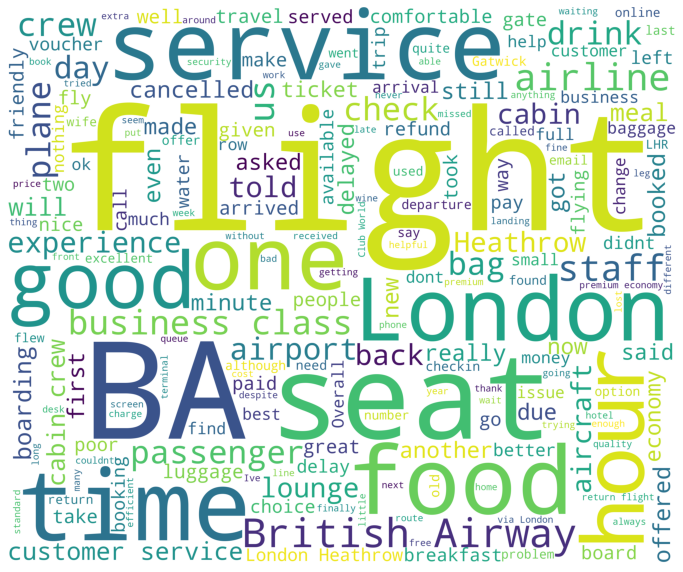

In [13]:
show_wordcloud(df_reviews)

# Tokenization and StopWord Removal

The Rule-based approach is a practical method for text analysis that doesn't rely on training or machine learning models. Instead, it utilizes a set of predefined rules known as lexicons. These lexicons allow the text to be labeled as positive, negative, or neutral based on the rules they contain. Commonly used lexicon-based approaches include TextBlob, VADER, and SentiWordNet.

In order to prepare the data for analysis using the Rule-based approach, several preprocessing steps are typically performed. These steps involve cleaning the text, tokenizing it into individual words or sentences, removing stopwords (commonly used words with little semantic value), and obtaining the stem words (the base form of words) to simplify the analysis process.

In [14]:
nltk.download('words')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package words to
[nltk_data]     /Users/ramtuptewar/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ramtuptewar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ramtuptewar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
#stop = stopwords.words('english')
additional_sw = [
    'flight', 'ba','verified','trip','british','airway','airways', 
    'airline', 'airlines', 'review','airport', 'also','told','london'
]

In [16]:
stop_dir = "/data/Stoplist.txt"
stop_words = set(stopwords.words('english'))
specific_stopwords =stop_dir + str(stop_words).join(additional_sw)

In [17]:
import nltk
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ramtuptewar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ramtuptewar/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ramtuptewar/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [18]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def clean_text(review):
    review = review.lower()
    tokens = nltk.word_tokenize(review) # converts review to tokens
    # stop_words removal
    review = [word for word in tokens if word not in specific_stopwords and word not in specific_stopwords and len(word) > 3] 
    review = [wordnet_lemmatizer.lemmatize(word) for word in review]
    review = ' '.join(review)# join words in preprocessed review
    return review

In [19]:
df_reviews['reviews'] = df_reviews['reviews'].apply(lambda review: clean_text(review))
df_reviews.head()

,reviews
0,havent flown never checkin process terrible sl...
1,itinerary supposed vegaschicagolondonvenice la...
2,busy full lounge crowded gate lounge quieter l...
3,worst seat ever encountered economy class room...
4,reason aware notice travel risk travelled year...


In [20]:
!pip install vaderSentiment

# VADER Analysis(Sentiment Analysis)

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

The sentiment analysis output consists of several scores: "compound," "pos," "neu," and "neg." The compound score is a normalized value ranging from -1 (extremely negative) to 1 (extremely positive). It is useful for summarizing the sentiment of a sentence into a single metric. Additionally, the compound score can be utilized to classify sentences as positive, neutral, or negative by applying the following recommended thresholds:

Positive sentiment: compound score >= 0.05
Neutral sentiment: compound score <= 0.05 and >= -0.05
Negative sentiment: compound score <= -0.05
These thresholds are commonly used to categorize sentiment based on the compound score obtained from sentiment analysis.

In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [22]:
i=0 
compval = [ ] 

while (i<len(df_reviews)):

    k = sia.polarity_scores(df_reviews.iloc[i]['reviews'])
    compval.append(k['compound'])
    i = i+1
    
compval = np.array(compval)

len(compval)

1000

In [23]:
df_reviews['VADER_score'] = compval
df_reviews.head(10)

,reviews,VADER_score
0,havent flown never checkin process terrible sl...,-0.3513
1,itinerary supposed vegaschicagolondonvenice la...,-0.8957
2,busy full lounge crowded gate lounge quieter l...,0.9538
3,worst seat ever encountered economy class room...,-0.8979
4,reason aware notice travel risk travelled year...,0.9353
5,easy check heathrow time issue return valencia...,0.4939
6,online check worked fine quick security check ...,0.8360
7,first lounge terminal dirty table used tablewa...,-0.6637
8,paid quick visit nice yesterday heathrow decid...,0.9623
9,word fail describe last awful baby across aisl...,-0.9779


In [24]:
# function to analyse
def vader_analysis(compval):
    if compval >= 0.05:
        return 'Positive'
    elif compval <= -0.05  :
        return 'Negative'
    else:
        return 'Neutral'
df_reviews['Analysis'] = df_reviews['VADER_score'].apply(vader_analysis)
df_reviews.head()

,reviews,VADER_score,Analysis
0,havent flown never checkin process terrible sl...,-0.3513,Negative
1,itinerary supposed vegaschicagolondonvenice la...,-0.8957,Negative
2,busy full lounge crowded gate lounge quieter l...,0.9538,Positive
3,worst seat ever encountered economy class room...,-0.8979,Negative
4,reason aware notice travel risk travelled year...,0.9353,Positive


# EDA

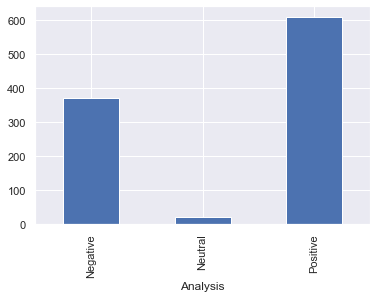

In [25]:
# Bar plot of review analysis
df_reviews.groupby('Analysis').size().plot(kind='bar')

([<matplotlib.patches.Wedge at 0x7fb684f4b610>,
 [Text(-0.3726117587821928, 1.0349688291041625, 'Positive'),
  Text(0.3035702255560347, -1.0572819482786313, 'Negative'),
  Text(1.3470631320882993, -0.08899954027106592, 'Neutral')],
 [Text(-0.2032427775175597, 0.564528452238634, '61.0%'),
  Text(0.16558375939420072, -0.576699244515617, '36.9%'),
  Text(0.8481508609444847, -0.05603674757807853, '2.1%')])

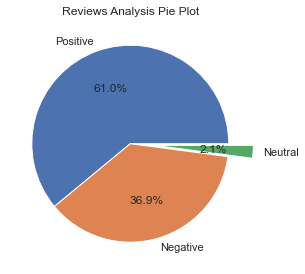

In [31]:
#Pie plot of review analysis
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))

vader_score_counts = df_reviews['Analysis'].value_counts()
plt.subplot(1,3,2)
plt.title("Reviews Analysis Pie Plot")
plt.pie(vader_score_counts.values, labels = vader_score_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%')

In [32]:
vader_score_counts

Analysis
Positive    610
Negative    369
Neutral      21
Name: count, dtype: int64

# Wordcloud
Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ramtuptewar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
#word cloud for negative reviews 
df = df_reviews[df_reviews['Analysis']=='Negative']

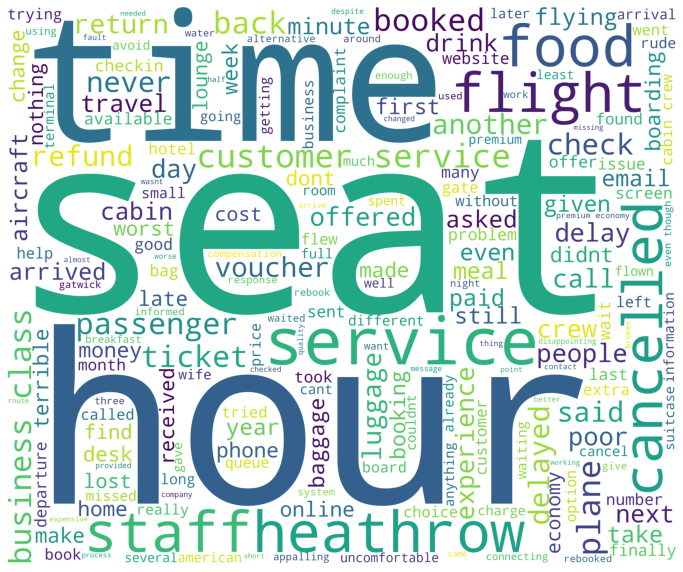

In [29]:
show_wordcloud(df)

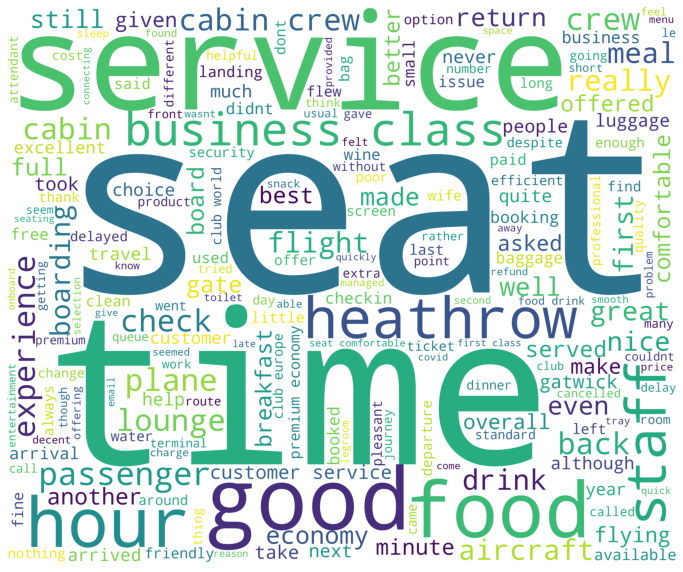

In [30]:
#word cloud for positive reviews 
df = df_reviews[df_reviews['Analysis']=='Positive']
show_wordcloud(df)